Runned and commented by Fernando Arevalo

Instalación de librerias:

In [9]:
#pip install pycaret

In [5]:
#python -m spacy download en_core_web_sm

In [ ]:
#python -m spacy download es_core_news_sm

In [ ]:
#pip install pyLDAvis==3.2.2

Importación de librerias:

In [1]:
#!pip install pycaret
#!python -m spacy download en_core_web_sm
#!python -m spacy download es_core_news_sm
#!pip install pyLDAvis==3.2.2

import numpy as np
import pandas as pd
import os
import re

import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style

import spacy
from spacy.lang.es.examples import sentences 
from spacy.lang.es.stop_words import STOP_WORDS
from nltk.corpus import stopwords


import nltk
from nltk.util import ngrams
import seaborn as sns
import pycaret
from pycaret.classification import * 
from pycaret.utils import version
from pycaret.nlp import *


import pyLDAvis
#import pyLDAvis.gensim_models
pyLDAvis.enable_notebook() 
version()

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

c:\Users\osval\.conda\envs\gwp\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


Leyendo archivo .csv:

In [2]:
df = pd.read_csv('gptw_co_si _pudiera_cambiar.csv', encoding="ISO-8859-1")

Mostramos en data frame:

In [3]:
df.head()

,answer
0,2. Incrementaria los salarios
1,3. Revisiones salariales más frecuentes para...
2,4. El favoritismo en puestos altos
3,6. disminuir el favoritismo hacia los argent...
4,8. en particular


Cargamos es_core_news_sm y descargamos stopwords:

In [4]:
nlp = spacy.load("es_core_news_sm")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\osval\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Limpieza y tokenización de datos:

In [5]:
def limpiar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    return(nuevo_texto)

In [6]:
# Se aplica la función limpiar a cada columna de texto
# ==============================================================================
df['answer'] = df['answer'].apply(lambda x: limpiar(x))
df

,answer
0,incrementaria los salarios
1,revisiones salariales más frecuentes para que...
2,el favoritismo en puestos altos
3,disminuir el favoritismo hacia los argentinos
4,en particular
...,...
1940,pago en dolares
1941,mejorar salarios
1942,pagos en dolares ya que en nuestra industria ...
1943,a nivel organizacional hay procesos que puede...


Aplicando stopwords:

In [7]:
stop_words = list(stopwords.words('spanish'))

In [8]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

df['answer_sw'] = df['answer'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

Lematización:

In [9]:
def lemmatizatizar(text):
    lemmatizer_text = nlp(text)
    lemmatizer_text = [word.lemma_ for word in lemmatizer_text]
    return " ".join(lemmatizer_text)

In [10]:
df['answer_lem'] = df['answer_sw'].apply(lambda x: lemmatizatizar(x))

In [11]:
df

,answer,answer_sw,answer_lem
0,incrementaria los salarios,incrementaria salarios,incrementaria salario
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revisión salarial frecuente banda
2,el favoritismo en puestos altos,favoritismo puestos altos,favoritismo puesto alto
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,disminuir favoritismo hacia argentino
4,en particular,particular,particular
...,...,...,...
1940,pago en dolares,pago dolares,pagar dolar
1941,mejorar salarios,mejorar salarios,mejorar salario
1942,pagos en dolares ya que en nuestra industria ...,pagos dolares industria suele pagar moneda,pago dolar industriar soler pagar monedar
1943,a nivel organizacional hay procesos que puede...,nivel organizacional procesos pueden funcionar...,nivel organizacional proceso poder funcionar r...


In [12]:
#def tokenizar(texto):
#    # Se convierte todo el texto a minúsculas
#    nuevo_texto = texto.lower()
#    nuevo_texto = nuevo_texto.split(sep = ' ')
#    # Eliminación de tokens con una longitud < 2
#    nuevo_texto = [token for token in nuevo_texto if len(token) > 3]
#    
#    return(nuevo_texto)

In [13]:
# Se aplica la función de limpieza y tokenización a cada columna de texto
# ==============================================================================
#df['answer_tok'] = df['answer_sw'].apply(lambda x: tokenizar(x))
#df[['answer_sw', 'answer_tok']].head()

In [14]:
#stop_words = list(stopwords.words('spanish'))

In [15]:
caret_set= setup(data = df, target= 'answer_lem',
                 custom_stopwords=['buen', 'hace', 'hacer', 'globant', 'glober', 'por', 'aca', 'ere', 
                                   'para', 'otra', 'desde', 'nuestro', 'con', 'bien', 'mi', 'estoy', 'su',
                                   'ser', 'son', 'esos', 'sus','donde','sin', 'como', 'tiene', 'eso', 'muy',
                                   'mucho', 'equipo','se', 'hay','kind', 'ingle', 'mejore', 'lidere',
                                   'sino', 'site', 'todo', 'aqui', 'puede', 'poder', 'detener', 'trato', 
                                   'area', 'work', 'skill', 'solo','sient','ofrec', 'trave', 'idea', 'tener','momento','vece', 'mucha'])

#caret_set= setup(data = df, target= 'answer', custom_stopwords = stop_words)

Description,Value
session_id,2943
Documents,1945
Vocab Size,637
Custom Stopwords,True


Creando el modelo lda:

In [16]:
lda = create_model(model= 'lda', multi_core=True, num_topics=4)
models()

,Name,Reference
ID,,
lda,Latent Dirichlet Allocation,gensim/models/ldamodel
lsi,Latent Semantic Indexing,gensim/models/lsimodel
hdp,Hierarchical Dirichlet Process,gensim/models/hdpmodel
rp,Random Projections,gensim/models/rpmodel
nmf,Non-Negative Matrix Factorization,sklearn.decomposition.NMF


In [17]:
print(lda)

LdaModel(num_terms=637, num_topics=4, decay=0.5, chunksize=100)


In [18]:
lda_results = assign_model(lda)

In [19]:
lda_results.head()

,answer,answer_sw,answer_lem,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,incrementaria los salarios,incrementaria salarios,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revision,0.125016,0.125016,0.62495,0.125018,Topic 2,0.62
2,el favoritismo en puestos altos,favoritismo puestos altos,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25
4,en particular,particular,particular,0.125024,0.624921,0.12503,0.125025,Topic 1,0.62


In [20]:
plot_model(lda, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.165903 -0.125906       1        1  25.999224
1     -0.119400  0.194074       2        1  25.744589
3      0.119634 -0.172499       3        1  25.617595
2      0.165670  0.104331       4        1  22.638592, topic_info=              Term       Freq      Total Category  logprob  loglift
8         personar  36.000000  36.000000  Default  30.0000  30.0000
11           dolar  33.000000  33.000000  Default  29.0000  29.0000
20         emplear  33.000000  33.000000  Default  28.0000  28.0000
48          actual  27.000000  27.000000  Default  27.0000  27.0000
24        salariar  24.000000  24.000000  Default  26.0000  26.0000
13         laboral  18.000000  18.000000  Default  25.0000  25.0000
65         cliente  16.000000  16.000000  Default  24.0000  24.0000
80       seniority  14.000000  14.000000  Default  23.0000  23.0000
18        personal  13.000000  13.000000  Default  22.0000  22.0000
147          decir  13.000000  13.000000  Default  21.0000  21.0000
62           mejor  13.000000  13.000000  Default  20.0000  20.0000
45            plan  10.000000  10.000000  Default  19.0000  19.0000
128      excelente  11.000000  11.000000  Default  18.0000  18.0000
127    devaluacion  11.000000  11.000000  Default  17.0000  17.0000
21          partir  17.000000  17.000000  Default  16.0000  16.0000
111       trabajar  10.000000  10.000000  Default  15.0000  15.0000
217   organizacion  10.000000  10.000000  Default  14.0000  14.0000
22        permitir  12.000000  12.000000  Default  13.0000  13.0000
222          total   8.000000   8.000000  Default  12.0000  12.0000
14           paise  13.000000  13.000000  Default  11.0000  11.0000
184           ideo   7.000000   7.000000  Default  10.0000  10.0000
465      funcionar   8.000000   8.000000  Default   9.0000   9.0000
636        pilotar   7.000000   7.000000  Default   8.0000   8.0000
635         europa   7.000000   7.000000  Default   7.0000   7.0000
633      evaluador   7.000000   7.000000  Default   6.0000   6.0000
208         cabeza   7.000000   7.000000  Default   5.0000   5.0000
142        parecer   8.000000   8.000000  Default   4.0000   4.0000
68            pais   7.000000   7.000000  Default   3.0000   3.0000
161           irse   7.000000   7.000000  Default   2.0000   2.0000
631       cooworke   7.000000   7.000000  Default   1.0000   1.0000
48          actual  26.805388  27.369957   Topic1  -2.7501   1.3263
24        salariar  23.866161  24.432047   Topic1  -2.8663   1.3237
147          decir  13.171600  13.771221   Topic1  -3.4607   1.3026
127    devaluacion  11.410929  11.992355   Topic1  -3.6042   1.2974
68            pais   7.163302   7.731813   Topic1  -4.0698   1.2707
161           irse   7.116842   7.703076   Topic1  -4.0763   1.2679
632       peticion   6.639413   7.265918   Topic1  -4.1457   1.2569
277      adicional   4.335282   4.898541   Topic1  -4.5720   1.2250
97    comunicacion   3.888109   4.449412   Topic1  -4.6808   1.2123
77   internacional   3.894631   4.461889   Topic1  -4.6791   1.2111
37         proceso   3.865257   4.431988   Topic1  -4.6867   1.2103
7            cargo   3.848864   4.416287   Topic1  -4.6910   1.2096
125          mayor   3.745411   4.337770   Topic1  -4.7182   1.2003
243       decision   3.218491   3.794176   Topic1  -4.8698   1.1825
233          extra   3.035001   3.599065   Topic1  -4.9285   1.1766
70         retener   2.819036   3.391242   Topic1  -5.0024   1.1623
25         conocer   3.340045   4.029117   Topic1  -4.8328   1.1595
301       vacacion   3.008235   3.643396   Topic1  -4.9374   1.1555
175          deber   2.545704   3.107369   Topic1  -5.1043   1.1477
66          querer   2.662347   3.277904   Topic1  -5.0595   1.1391
405       detallar   2.307643   2.871370   Topic1  -5.2025   1.1285
14           paise  10.323848  13.039120   Topic1  -3.7043   1.1136
234          legal   2.077185

In [21]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [22]:
#plot_model(lda, plot ='tsne')

Importación de nltk y descarga de vader_lexicon

In [23]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\osval\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Importamos SentimentIntensityAnalyzer para realizar el analisis de sentimientos

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [25]:
sid.polarity_scores(df.loc[0]['answer'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [26]:
df['scores'] = df['answer'].apply(lambda x: sid.polarity_scores(x))

Se imprimen los polarity scores.
Como se puede observar se le asigna a un valor ya sea a negativo, neutral o positivo.

In [27]:
df.head()

,answer,answer_sw,answer_lem,scores
0,incrementaria los salarios,incrementaria salarios,incrementaria salario,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revisión salarial frecuente banda,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,el favoritismo en puestos altos,favoritismo puestos altos,favoritismo puesto alto,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,disminuir favoritismo hacia argentino,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,en particular,particular,particular,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [28]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,answer,answer_sw,answer_lem,scores,compound
0,incrementaria los salarios,incrementaria salarios,incrementaria salario,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revisión salarial frecuente banda,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,el favoritismo en puestos altos,favoritismo puestos altos,favoritismo puesto alto,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,disminuir favoritismo hacia argentino,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,en particular,particular,particular,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


Se agrega la etiqueta para saber concretamente si el resultado fue positivo, negativo o neutro.

In [29]:
df['Flag'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,answer,answer_sw,answer_lem,scores,compound,Flag
0,incrementaria los salarios,incrementaria salarios,incrementaria salario,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revisión salarial frecuente banda,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
2,el favoritismo en puestos altos,favoritismo puestos altos,favoritismo puesto alto,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,disminuir favoritismo hacia argentino,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos
4,en particular,particular,particular,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,pos


In [30]:
df[['answer_sw', 'Flag', 'scores']].to_csv('sent_si_pudiera_cambiar_encoding.csv',  index=False)

Instalamos tk y typing

In [26]:
#pip install tk

In [28]:
#pip install typing

Graficamos los resultados positivos y negativos provenientes del analisis de sentimientos.

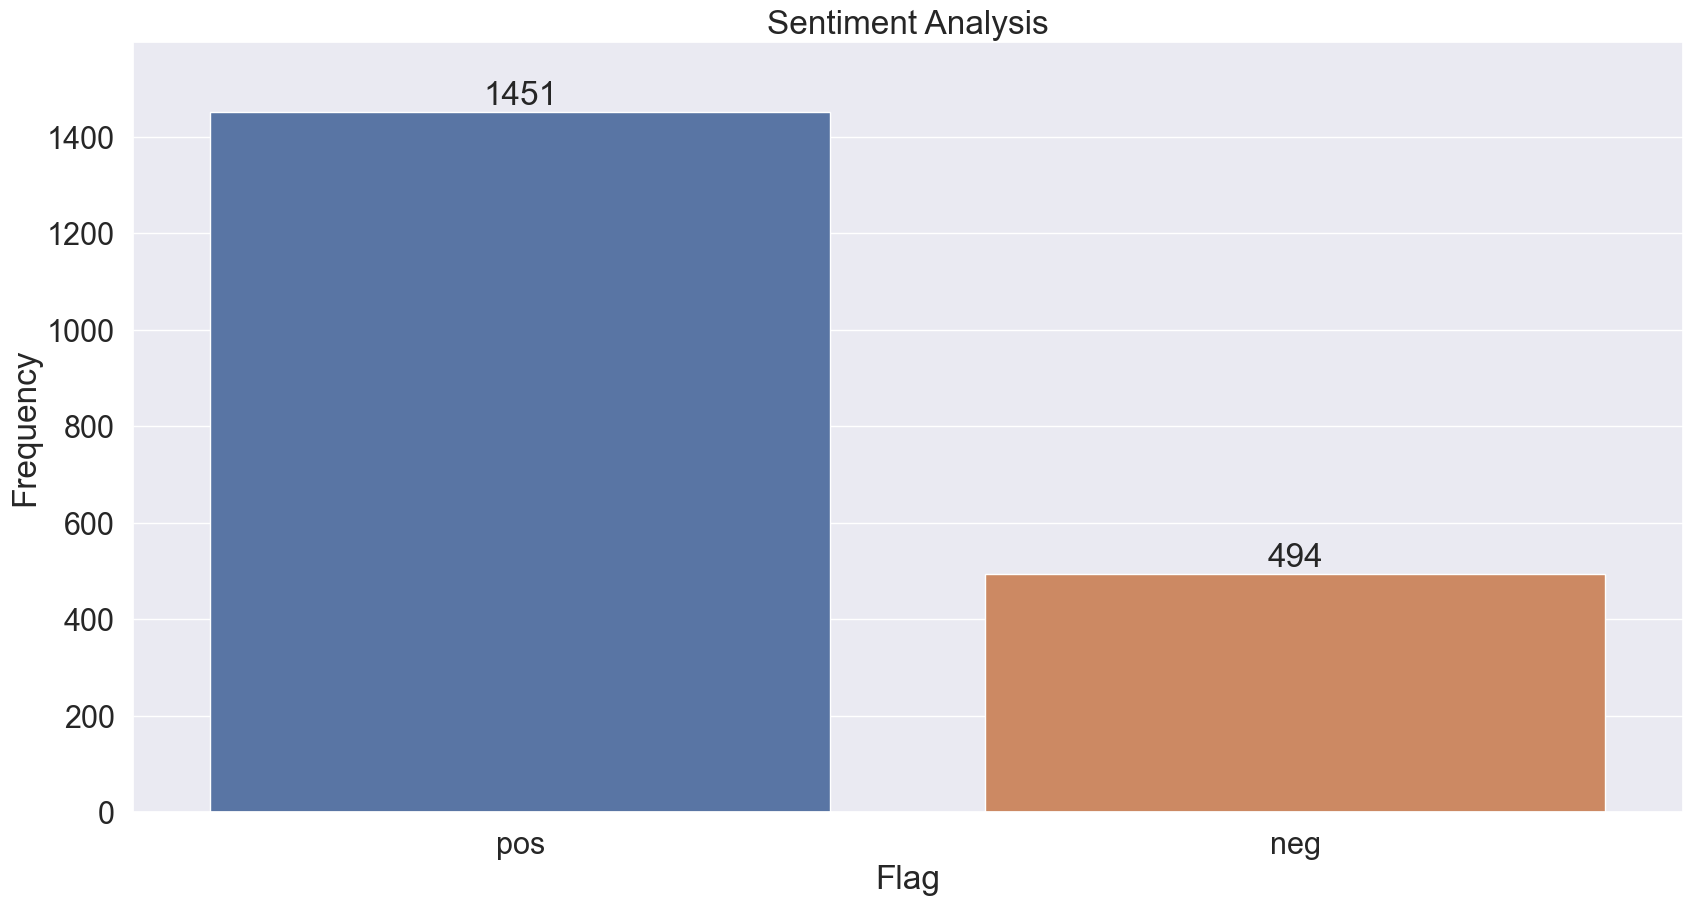

In [31]:
from tkinter import font
from typing import OrderedDict


plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
df
gen_cnt = df['Flag'].value_counts().sort_values(ascending=False)
order=gen_cnt.index
ax = sns.countplot(x='Flag', data=df, order= ('pos', 'neg'))
plt.xticks(rotation = 360)
plt.yticks()
plt.ylabel('Frequency')
plt.title('Sentiment Analysis')

# annotate
ax.bar_label(ax.containers[0], label_type="edge")

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

plt.show()

In [32]:
df.drop(['answer','answer_sw', 'compound'], axis= 1, inplace=True)
df.head()

,answer_lem,scores,Flag
0,incrementaria salario,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
1,revisión salarial frecuente banda,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
2,favoritismo puesto alto,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
3,disminuir favoritismo hacia argentino,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
4,particular,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos


In [33]:

df2 = pd.concat([lda_results, df], axis=1)

In [34]:
df2.head()

,answer,answer_sw,answer_lem,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic,answer_lem,scores,Flag
0,incrementaria los salarios,incrementaria salarios,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25,incrementaria salario,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
1,revisiones salariales más frecuentes para que...,revisiones salariales frecuentes banda,revision,0.125016,0.125016,0.62495,0.125018,Topic 2,0.62,revisión salarial frecuente banda,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
2,el favoritismo en puestos altos,favoritismo puestos altos,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25,favoritismo puesto alto,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
3,disminuir el favoritismo hacia los argentinos,disminuir favoritismo hacia argentinos,,0.250000,0.250000,0.25000,0.250000,Topic 0,0.25,disminuir favoritismo hacia argentino,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
4,en particular,particular,particular,0.125024,0.624921,0.12503,0.125025,Topic 1,0.62,particular,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos


In [35]:
df2 = df2[['Flag', 'Topic_0',	'Topic_1',	'Topic_2',	'Topic_3']]
df2.head()

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,pos,0.250000,0.250000,0.25000,0.250000
1,pos,0.125016,0.125016,0.62495,0.125018
2,pos,0.250000,0.250000,0.25000,0.250000
3,pos,0.250000,0.250000,0.25000,0.250000
4,pos,0.125024,0.624921,0.12503,0.125025


In [36]:
from pycaret.classification import * 

Entrenamos el modelo de clasificación usando el 80% de los datos. Y obetenemos los resultados de los diferentes modelos:

In [37]:
pce = setup(data= df2, target= 'Flag', session_id= 5, train_size= 0.8)
models()

,Description,Value
0,session_id,5
1,Target,Flag
2,Target Type,Binary
3,Label Encoded,"neg: 0, pos: 1"
4,Original Data,"(1945, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


We compare the models:

In [38]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7571,0.4942,1.0000,0.7571,0.8617,0.0000,0.0000,1.8890
svm,SVM - Linear Kernel,0.7571,0.0000,1.0000,0.7571,0.8617,0.0000,0.0000,0.0100
ridge,Ridge Classifier,0.7571,0.0000,1.0000,0.7571,0.8617,0.0000,0.0000,0.0150
lda,Linear Discriminant Analysis,0.7571,0.4900,1.0000,0.7571,0.8617,0.0000,0.0000,0.0080
dummy,Dummy Classifier,0.7571,0.5000,1.0000,0.7571,0.8617,0.0000,0.0000,0.0080
ada,Ada Boost Classifier,0.7500,0.5298,0.9754,0.7614,0.8552,0.0326,0.0711,0.0760
knn,K Neighbors Classifier,0.7430,0.5268,0.9559,0.7639,0.8491,0.0477,0.0696,0.0370
gbc,Gradient Boosting Classifier,0.7410,0.5259,0.9567,0.7620,0.8483,0.0355,0.0577,0.1210
nb,Naive Bayes,0.7365,0.5360,0.9466,0.7628,0.8446,0.0378,0.0504,0.0120
lightgbm,Light Gradient Boosting Machine,0.7346,0.5303,0.9346,0.7661,0.8420,0.0595,0.0754,0.0580


Creamos el modelo con el mejor modelo 'lr': logistic regression

In [39]:
pce1 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7564,0.4435,1.0000,0.7564,0.8613,0.0000,0.0000
1,0.7564,0.4769,1.0000,0.7564,0.8613,0.0000,0.0000
2,0.7564,0.5495,1.0000,0.7564,0.8613,0.0000,0.0000
3,0.7564,0.5162,1.0000,0.7564,0.8613,0.0000,0.0000
4,0.7564,0.4669,1.0000,0.7564,0.8613,0.0000,0.0000
5,0.7564,0.4835,1.0000,0.7564,0.8613,0.0000,0.0000
6,0.7613,0.4832,1.0000,0.7613,0.8645,0.0000,0.0000
7,0.7613,0.6127,1.0000,0.7613,0.8645,0.0000,0.0000
8,0.7548,0.4912,1.0000,0.7548,0.8603,0.0000,0.0000


Calibramos el modelo:

In [40]:
tune_pce1 = tune_model(pce1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7564,0.4435,1.0000,0.7564,0.8613,0.0000,0.0000
1,0.7564,0.4769,1.0000,0.7564,0.8613,0.0000,0.0000
2,0.7564,0.5495,1.0000,0.7564,0.8613,0.0000,0.0000
3,0.7564,0.5188,1.0000,0.7564,0.8613,0.0000,0.0000
4,0.7564,0.4669,1.0000,0.7564,0.8613,0.0000,0.0000
5,0.7564,0.4839,1.0000,0.7564,0.8613,0.0000,0.0000
6,0.7613,0.4832,1.0000,0.7613,0.8645,0.0000,0.0000
7,0.7613,0.6127,1.0000,0.7613,0.8645,0.0000,0.0000
8,0.7548,0.4912,1.0000,0.7548,0.8603,0.0000,0.0000


Evaluamos el modelo:

In [41]:
evaluate_model(tune_pce1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Realizamos la predicción:

In [42]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7018,0.5543,1.0000,0.7018,0.8248,0.0000,0.0000


,Topic_0,Topic_1,Topic_2,Topic_3,Flag,Label,Score
0,0.250000,0.250000,0.250000,0.250000,pos,pos,0.7583
1,0.125304,0.624018,0.125360,0.125318,pos,pos,0.7527
2,0.250000,0.250000,0.250000,0.250000,pos,pos,0.7583
3,0.616740,0.125028,0.125099,0.133134,pos,pos,0.7633
4,0.250000,0.250000,0.250000,0.250000,pos,pos,0.7583
...,...,...,...,...,...,...,...
384,0.250000,0.250000,0.250000,0.250000,pos,pos,0.7583
385,0.250000,0.250000,0.250000,0.250000,pos,pos,0.7583
386,0.125026,0.125027,0.624920,0.125027,neg,pos,0.7873
387,0.250000,0.250000,0.250000,0.250000,neg,pos,0.7583


In [43]:
#save_model(best_model, 'Si_Pudiera_Vader_Model_29NOV2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 